In [ ]:
from google.colab import drive
drive.mount("/content/drive")

import pandas as pd
data = pd.read_csv("/content/drive/My Drive/CIS_412 Project: Flight Delays/FlightDelays.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data.head()

,CRS_DEP_TIME,CARRIER,DEP_TIME,DEST,DISTANCE,FL_DATE,FL_NUM,ORIGIN,Weather,DAY_WEEK,DAY_OF_MONTH,TAIL_NUM,Flight Status
0,1455,OH,1455,JFK,184,01/01/2004,5935,BWI,0,4,1,N940CA,ontime
1,1640,DH,1640,JFK,213,01/01/2004,6155,DCA,0,4,1,N405FJ,ontime
2,1245,DH,1245,LGA,229,01/01/2004,7208,IAD,0,4,1,N695BR,ontime
3,1715,DH,1709,LGA,229,01/01/2004,7215,IAD,0,4,1,N662BR,ontime
4,1039,DH,1035,LGA,229,01/01/2004,7792,IAD,0,4,1,N698BR,ontime


In [ ]:
#PROPOSED TECHNIQUES
# 1. Descriptive Statistics

descriptive_stats = data.describe()
print(descriptive_stats)

       CRS_DEP_TIME     DEP_TIME     DISTANCE       FL_NUM      Weather  \
count   2201.000000  2201.000000  2201.000000  2201.000000  2201.000000   
mean    1371.938664  1369.298955   211.871422  3815.086324     0.014539   
std      432.697149   442.462754    13.316815  2409.750224     0.119725   
min      600.000000    10.000000   169.000000   746.000000     0.000000   
25%     1000.000000  1004.000000   213.000000  2156.000000     0.000000   
50%     1455.000000  1450.000000   214.000000  2385.000000     0.000000   
75%     1710.000000  1709.000000   214.000000  6155.000000     0.000000   
max     2130.000000  2330.000000   229.000000  7924.000000     1.000000   

          DAY_WEEK  DAY_OF_MONTH  
count  2201.000000   2201.000000  
mean      3.905498     16.024989  
std       1.903149      8.677390  
min       1.000000      1.000000  
25%       2.000000      8.000000  
50%       4.000000     16.000000  
75%       5.000000     23.000000  
max       7.000000     31.000000  


In [ ]:
data['Flight Status'].value_counts()

Flight Status
ontime     1773
delayed     428
Name: count, dtype: int64

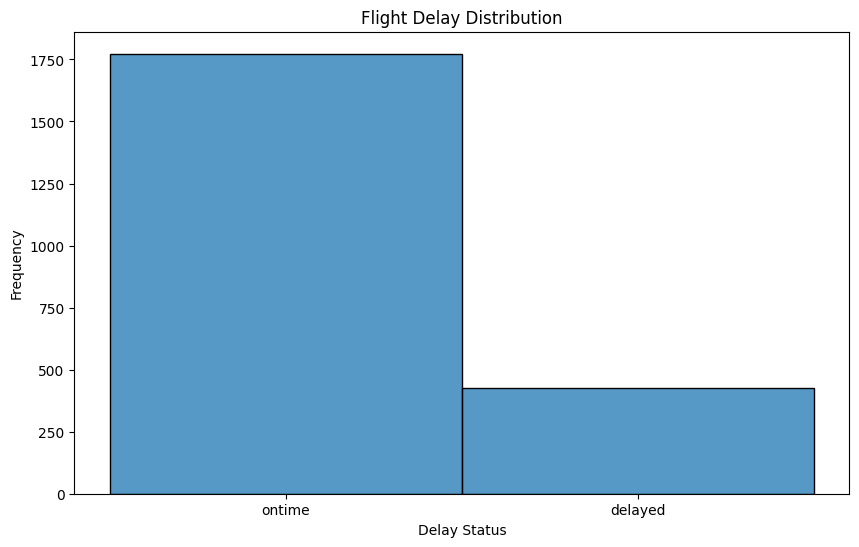

In [ ]:
# Data Visualization: distribution of flight delays

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(data['Flight Status'])
plt.title('Flight Delay Distribution')
plt.xlabel('Delay Status')
plt.ylabel('Frequency')
plt.show()

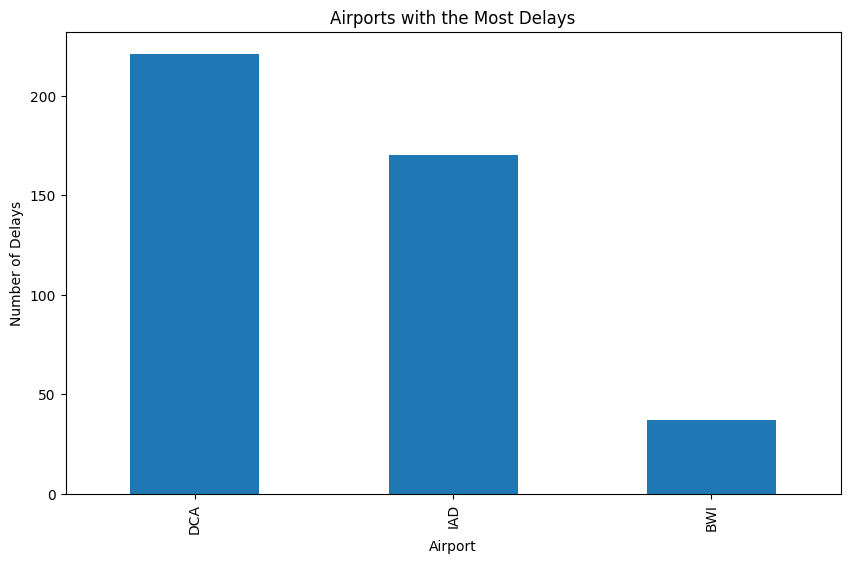

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Filter the data to include only delayed flights
delayed_data = data[data['Flight Status'] == 'delayed']

# Group the data by origin airport and count the number of delayed flights for each airport
airport_delays = delayed_data.groupby('ORIGIN').size().sort_values(ascending=False)

# Create a bar chart showing the airports with the most delays
plt.figure(figsize=(10, 6))
airport_delays.head(10).plot(kind='bar', color='C0')
plt.title('Airports with the Most Delays')
plt.xlabel('Airport')
plt.ylabel('Number of Delays')
plt.show()


In [ ]:
columns_to_drop = ['FL_DATE', 'FL_NUM', 'DAY_OF_MONTH', 'TAIL_NUM']
data.drop(columns=columns_to_drop, inplace=True)

In [ ]:
# Adding new column to calculate the difference between actual and scheduled departure times
data['DEP_DIFF'] = data['DEP_TIME'] - data['CRS_DEP_TIME']

# Clip negative values to zero to keep y-axis positive when we graph it later
data['DEP_DIFF'] = data['DEP_DIFF'].clip(lower=0)

In [ ]:
  # Relabel days of the week to start with Monday (1) and end with Sunday (7)

  data['DAY_WEEK'] = data['DAY_WEEK'].map({
      1: 'Monday',
      2: 'Tuesday',
      3: 'Wednesday',
      4: 'Thursday',
      5: 'Friday',
      6: 'Saturday',
      7: 'Sunday'
  })

  # Count delays for each day of the week
  delay_counts = data[data['Flight Status'] == 'delayed'].groupby('DAY_WEEK').size()
  delay_counts = delay_counts.sort_values(ascending=False)

  # Print the delay counts
  print("Delay counts for each day of the week:")
  print(delay_counts)

Delay counts for each day of the week:
DAY_WEEK
Monday       84
Friday       75
Sunday       68
Tuesday      63
Thursday     57
Wednesday    57
Saturday     24
dtype: int64


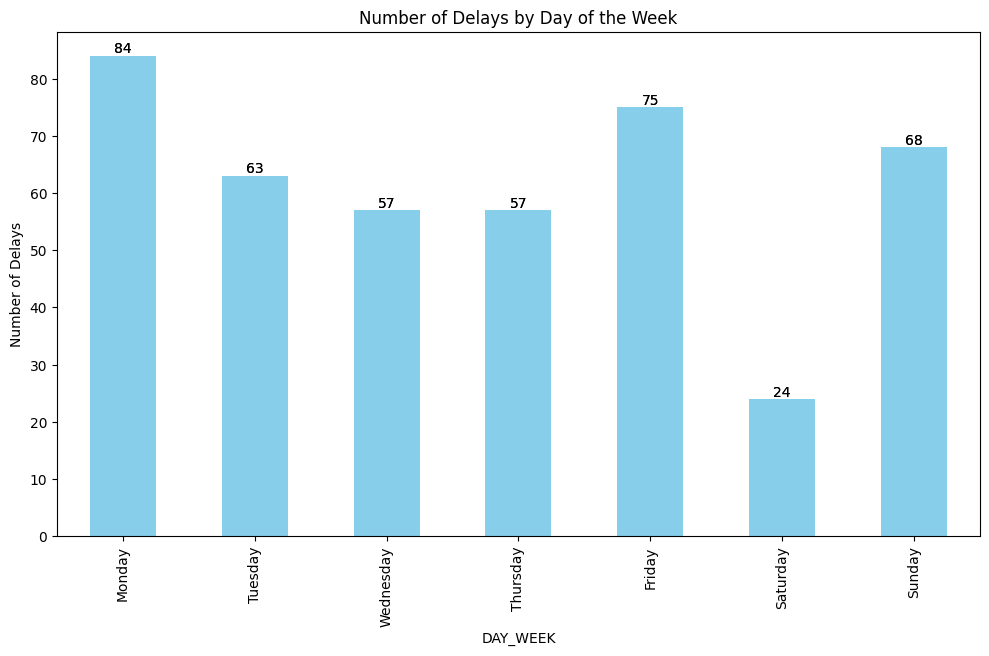

In [ ]:
# Sort delay counts in ascending order of day of the week
delay_counts = delay_counts.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Bar plot for daily delay counts
plt.figure(figsize=(10, 6))
delay_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Delays by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Delays')
plt.xticks(rotation=0)  # Do not rotate x-axis labels since they are in the desired order
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines for better visualization
plt.tight_layout()

# Annotate each bar with its value
bars = delay_counts.plot(kind='bar', color='skyblue')
for bar in bars.patches:
    plt.annotate(format(bar.get_height(), '.0f'),
                 (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                 ha='center', va='center',
                 xytext=(0, 5),
                 textcoords='offset points')

plt.show()

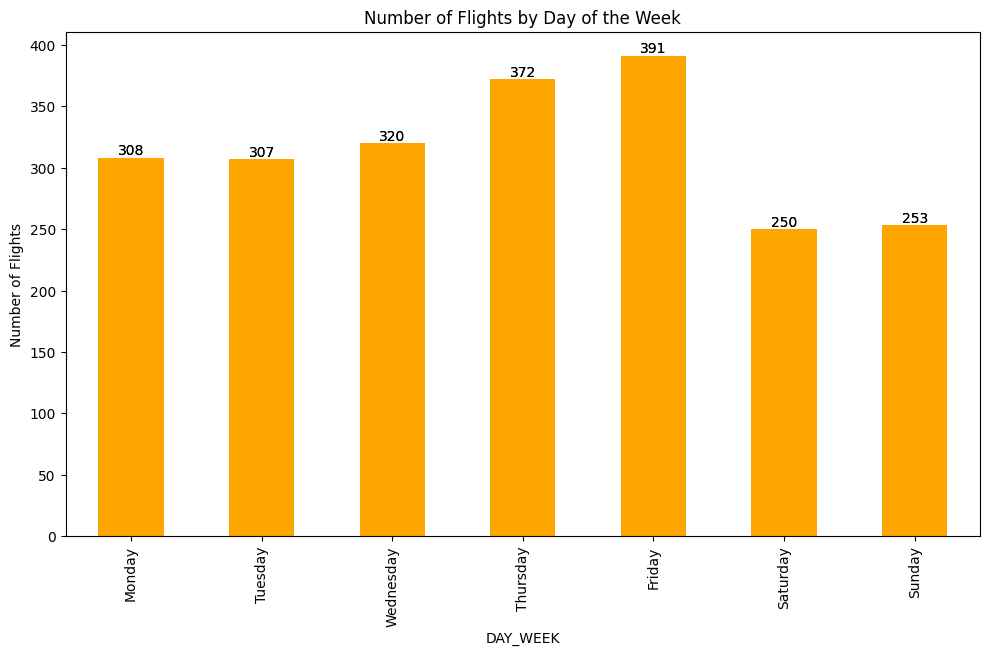

In [ ]:
# Count flights for each day of the week
flight_counts = data.groupby('DAY_WEEK').size()

# Reorder days of the week to start with Monday and end with Sunday
flight_counts = flight_counts.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Plot the bar graph
plt.figure(figsize=(10, 6))
flight_counts.plot(kind='bar', color='orange')
plt.title('Number of Flights by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Flights')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Annotate each bar with its value
bars = flight_counts.plot(kind='bar', color='orange')
for bar in bars.patches:
    plt.annotate(format(bar.get_height(), '.0f'),
                 (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                 ha='center', va='center',
                 xytext=(0, 5),
                 textcoords='offset points')

plt.show()

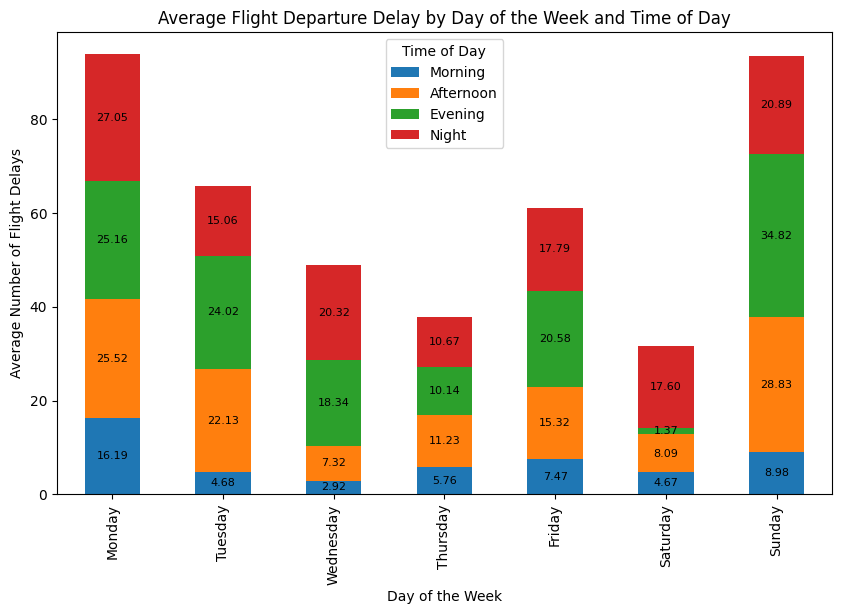

In [ ]:
# Define time of day bins
def classify_time_of_day(time):
    hour = int(time // 100)
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

# Create a new column 'Time_of_Day'
data['Time_of_Day'] = data['CRS_DEP_TIME'].apply(classify_time_of_day)

# Group data by day of the week and time of day, and calculate average delay
avg_delay = data.groupby(['DAY_WEEK', 'Time_of_Day'])['DEP_DIFF'].mean().unstack()

# Reorder days of the week to start with Monday and end with Sunday
avg_delay = avg_delay[['Morning', 'Afternoon', 'Evening', 'Night']].reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Plot the stacked bar chart
fig, ax = plt.subplots(figsize=(10, 6))

# Use pandas DataFrame plot method with kind='bar' to create the stacked bar chart
avg_delay.plot(kind='bar', stacked=True, ax=ax)

# Display values on the stacked bar chart
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        if height > 0:  # Only display the text if height > 0
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                bar.get_y() + height / 2,
                f'{height:.2f}',
                ha='center',
                va='center',
                color='black',
                fontsize=8
            )

# Customize plot appearance
ax.set_title('Average Flight Departure Delay by Day of the Week and Time of Day')
ax.set_xlabel('Day of the Week')
ax.set_ylabel('Average Number of Flight Delays')
ax.legend(title='Time of Day')

# Show the plot
plt.show()

In [ ]:
# Create an indicator variable, or you can use labelencoder()
# data['isDelayed'] = [1 if status == 'delayed' else 0 for status in data['Flight Status']]

# group information by day of week and determine the average delay
# averageDelay = data.groupby(['DAY_WEEK'])['isDelayed'].mean()

# create a bar chart
# ax = averageDelay.plot.bar(color='C0')
# ax.set_xlabel('Day of week')
# ax.set_ylabel('Average Delay')
# _ = ax.set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])

In [ ]:
#Standardize numerical variables
from sklearn.preprocessing import StandardScaler
import numpy as np

#select numerical columns
numerical_columns = data.select_dtypes(include=np.number).columns

#initiate MinMaxScaler
stdscaler = StandardScaler()
data[numerical_columns] = stdscaler.fit_transform(data[numerical_columns])


data.describe().round(3)

#PREPROCESS THE TIME VARIABLES

,CRS_DEP_TIME,DEP_TIME,DISTANCE,Weather,DEP_DIFF
count,2201.000,2201.000,2201.000,2201.000,2201.000
mean,0.000,0.000,0.000,0.000,0.000
std,1.000,1.000,1.000,1.000,1.000
min,-1.784,-3.073,-3.220,-0.121,-0.347
25%,-0.860,-0.826,0.085,-0.121,-0.347
50%,0.192,0.182,0.160,-0.121,-0.347
75%,0.781,0.768,0.160,-0.121,-0.299
max,1.752,2.172,1.287,8.233,9.914


In [ ]:
# convert to categorical
data.DAY_WEEK = data.DAY_WEEK.astype('category')

# create hourly bins departure time
data.CRS_DEP_TIME = data.CRS_DEP_TIME.astype('category')

# predictors = ['DAY_WEEK', 'CRS_DEP_TIME', 'ORIGIN', 'DEST', 'CARRIER', 'Weather']
# outcome = 'isDelayed'

# X = pd.get_dummies(data[predictors], drop_first=True)
# y = data[outcome]
# classes = ['ontime', 'delayed']

In [ ]:
data

,CRS_DEP_TIME,CARRIER,DEP_TIME,DEST,DISTANCE,ORIGIN,Weather,DAY_WEEK,Flight Status,DEP_DIFF,Time_of_Day
0,0.192005,OH,0.193735,JFK,-2.093425,BWI,-0.121463,Thursday,ontime,-0.346936,Afternoon
1,0.619653,DH,0.611944,JFK,0.084768,DCA,-0.121463,Thursday,ontime,-0.346936,Afternoon
2,-0.293433,DH,-0.280989,LGA,1.286529,IAD,-0.121463,Thursday,ontime,-0.346936,Afternoon
3,0.793024,DH,0.767925,LGA,1.286529,IAD,-0.121463,Thursday,ontime,-0.346936,Evening
4,-0.769624,DH,-0.755713,LGA,1.286529,IAD,-0.121463,Thursday,ontime,-0.346936,Morning
...,...,...,...,...,...,...,...,...,...,...,...
2196,-1.680399,RU,-1.639604,EWR,-0.966774,DCA,-0.121463,Saturday,ontime,-0.346936,Morning
2197,0.758350,RU,0.641332,EWR,0.084768,IAD,-0.121463,Saturday,ontime,-0.346936,Evening
2198,0.527189,RU,0.426576,EWR,-0.966774,DCA,-0.121463,Saturday,ontime,-0.346936,Afternoon
2199,-0.029909,RU,0.076184,EWR,-0.966774,DCA,-0.121463,Saturday,ontime,0.715338,Afternoon


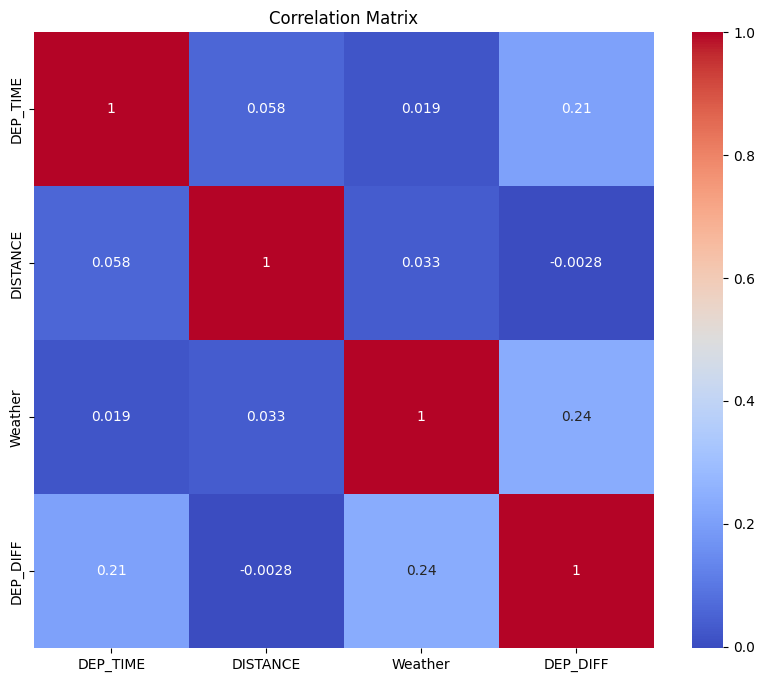

In [ ]:
# Select numerical columns
numerical_columns = data.select_dtypes(include=np.number).columns

# Compute correlation matrix
corr_matrix = data[numerical_columns].corr()

# Visualize correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Going to add some visuals here
# Filter data for delayed flights
delayed_flights = data[data['Flight Status'] == 'delayed']

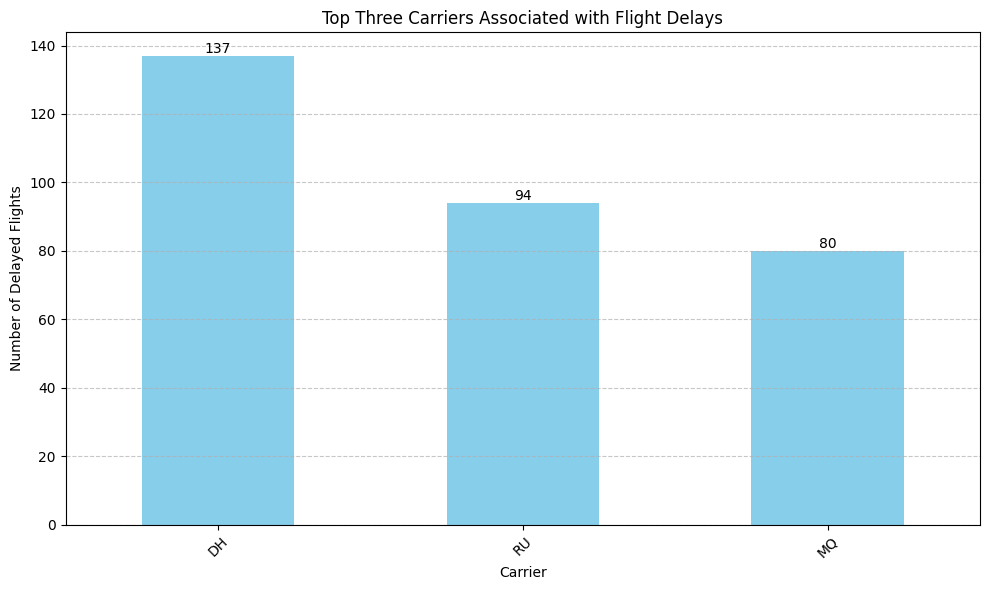

In [ ]:
# Group data by carrier and count delayed flights
carrier_delay_counts = delayed_flights.groupby('CARRIER').size()

# Sort carriers by the number of delayed flights
carrier_delay_counts = carrier_delay_counts.sort_values(ascending=False)

# Select top three carriers with the highest number of delayed flights
top_three_carriers = carrier_delay_counts.head(3)

# Plot bar chart for top three carriers
plt.figure(figsize=(10, 6))
top_three_carriers.plot(kind='bar', color='skyblue')
plt.title('Top Three Carriers Associated with Flight Delays')
plt.xlabel('Carrier')
plt.ylabel('Number of Delayed Flights')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Annotate each bar with its value
for bar in plt.gca().patches:
    plt.gca().annotate(format(bar.get_height(), '.0f'),
                       (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                       ha='center', va='center',
                       xytext=(0, 5),
                       textcoords='offset points')

plt.show()

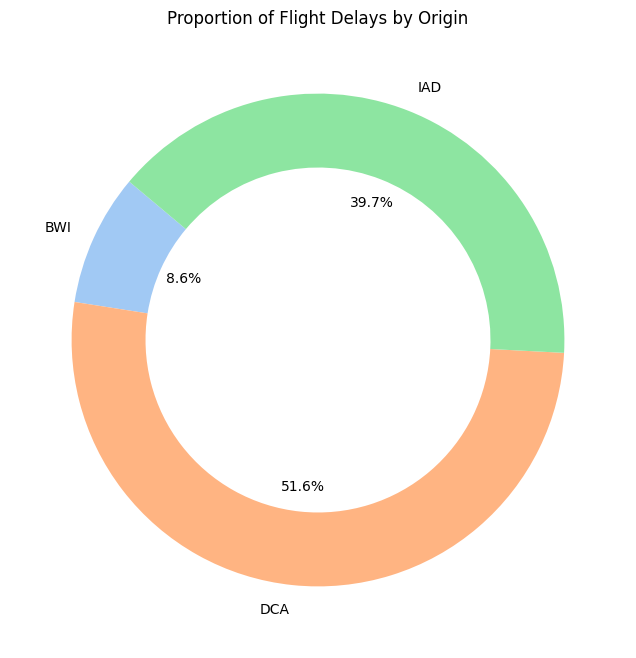

In [ ]:
# Group data by origin and count delayed flights
destination_delay_counts = delayed_flights.groupby('ORIGIN').size()

# Pie chart for delayed flights by origin
plt.figure(figsize=(10, 8))
destination_delay_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'), wedgeprops=dict(width=0.3))
plt.title('Proportion of Flight Delays by Origin')
plt.ylabel('')  # Remove the y-label
plt.show()

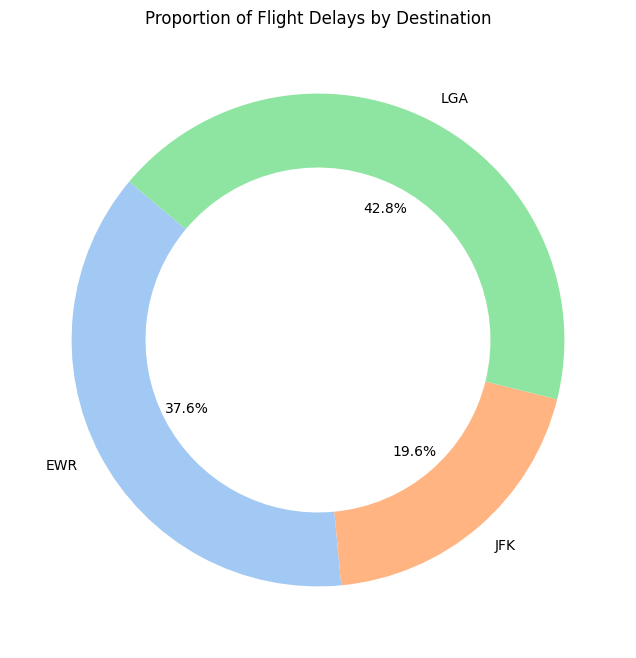

In [ ]:
# Group data by destination and count delayed flights
destination_delay_counts = delayed_flights.groupby('DEST').size()

# Pie chart for delayed flights by destination
plt.figure(figsize=(10, 8))
destination_delay_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'), wedgeprops=dict(width=0.3))
plt.title('Proportion of Flight Delays by Destination')
plt.ylabel('')  # Remove the y-label
plt.show()

In [ ]:
# We want the target variable to be last

new_columns_order = ['CRS_DEP_TIME', 'DEP_TIME', 'DEP_DIFF', 'DAY_WEEK', 'CARRIER', 'ORIGIN', 'DEST', 'DISTANCE', 'Weather', 'Time_of_Day', 'Flight Status']
data = data.reindex(columns=new_columns_order)

In [ ]:
data

,CRS_DEP_TIME,DEP_TIME,DEP_DIFF,DAY_WEEK,CARRIER,ORIGIN,DEST,DISTANCE,Weather,Time_of_Day,Flight Status
0,0.192005,0.193735,-0.346936,Thursday,OH,BWI,JFK,-2.093425,-0.121463,Afternoon,ontime
1,0.619653,0.611944,-0.346936,Thursday,DH,DCA,JFK,0.084768,-0.121463,Afternoon,ontime
2,-0.293433,-0.280989,-0.346936,Thursday,DH,IAD,LGA,1.286529,-0.121463,Afternoon,ontime
3,0.793024,0.767925,-0.346936,Thursday,DH,IAD,LGA,1.286529,-0.121463,Evening,ontime
4,-0.769624,-0.755713,-0.346936,Thursday,DH,IAD,LGA,1.286529,-0.121463,Morning,ontime
...,...,...,...,...,...,...,...,...,...,...,...
2196,-1.680399,-1.639604,-0.346936,Saturday,RU,DCA,EWR,-0.966774,-0.121463,Morning,ontime
2197,0.758350,0.641332,-0.346936,Saturday,RU,IAD,EWR,0.084768,-0.121463,Evening,ontime
2198,0.527189,0.426576,-0.346936,Saturday,RU,DCA,EWR,-0.966774,-0.121463,Afternoon,ontime
2199,-0.029909,0.076184,0.715338,Saturday,RU,DCA,EWR,-0.966774,-0.121463,Afternoon,ontime


In [ ]:
data.isnull().sum()

CRS_DEP_TIME     0
DEP_TIME         0
DEP_DIFF         0
DAY_WEEK         0
CARRIER          0
ORIGIN           0
DEST             0
DISTANCE         0
Weather          0
Time_of_Day      0
Flight Status    0
dtype: int64

In [ ]:
y = data['Flight Status']

X = data.drop(columns=['Flight Status'])

In [ ]:
# Encode categorical variables after splitting
from sklearn.preprocessing import LabelEncoder

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

# Encode target variable 'y'
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

In [ ]:
# Perform feature engineering (create 'Time_of_Day' feature) using only training data
def classify_time_of_day(time):
    hour = int(time // 100)
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

# Apply feature engineering to 'Time_of_Day' in training and testing sets
X_train['Time_of_Day'] = X_train['CRS_DEP_TIME'].apply(classify_time_of_day)
X_test['Time_of_Day'] = X_test['CRS_DEP_TIME'].apply(classify_time_of_day)

# Drop 'CRS_DEP_TIME' column as it's no longer needed
X_train.drop(columns=['CRS_DEP_TIME'], inplace=True)
X_test.drop(columns=['CRS_DEP_TIME'], inplace=True)

# Encode categorical variables using one-hot encoding
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

**DECISION TREE**

In [ ]:
#DATA MINING MODELS
# 1. Decision Tree Model

from sklearn.tree import DecisionTreeClassifier

# Create a decision tree classifier with limited depth and minimum samples per leaf
tree_pruned = DecisionTreeClassifier(max_depth=4, min_samples_leaf=10, random_state=0, criterion="entropy")

# Fit the model to the training data
tree_pruned.fit(X_train, y_train)

# Predict on the test set
y_pruned_pred = tree_pruned.predict(X_test)

In [ ]:
# Decision Tree evaluation

from sklearn.metrics import accuracy_score

print("Accuracy on training set:", tree_pruned.score(X_train, y_train).round(3))
print("Accuracy on test set:", tree_pruned.score(X_test, y_test).round(3))

Accuracy on training set: 0.917
Accuracy on test set: 0.925


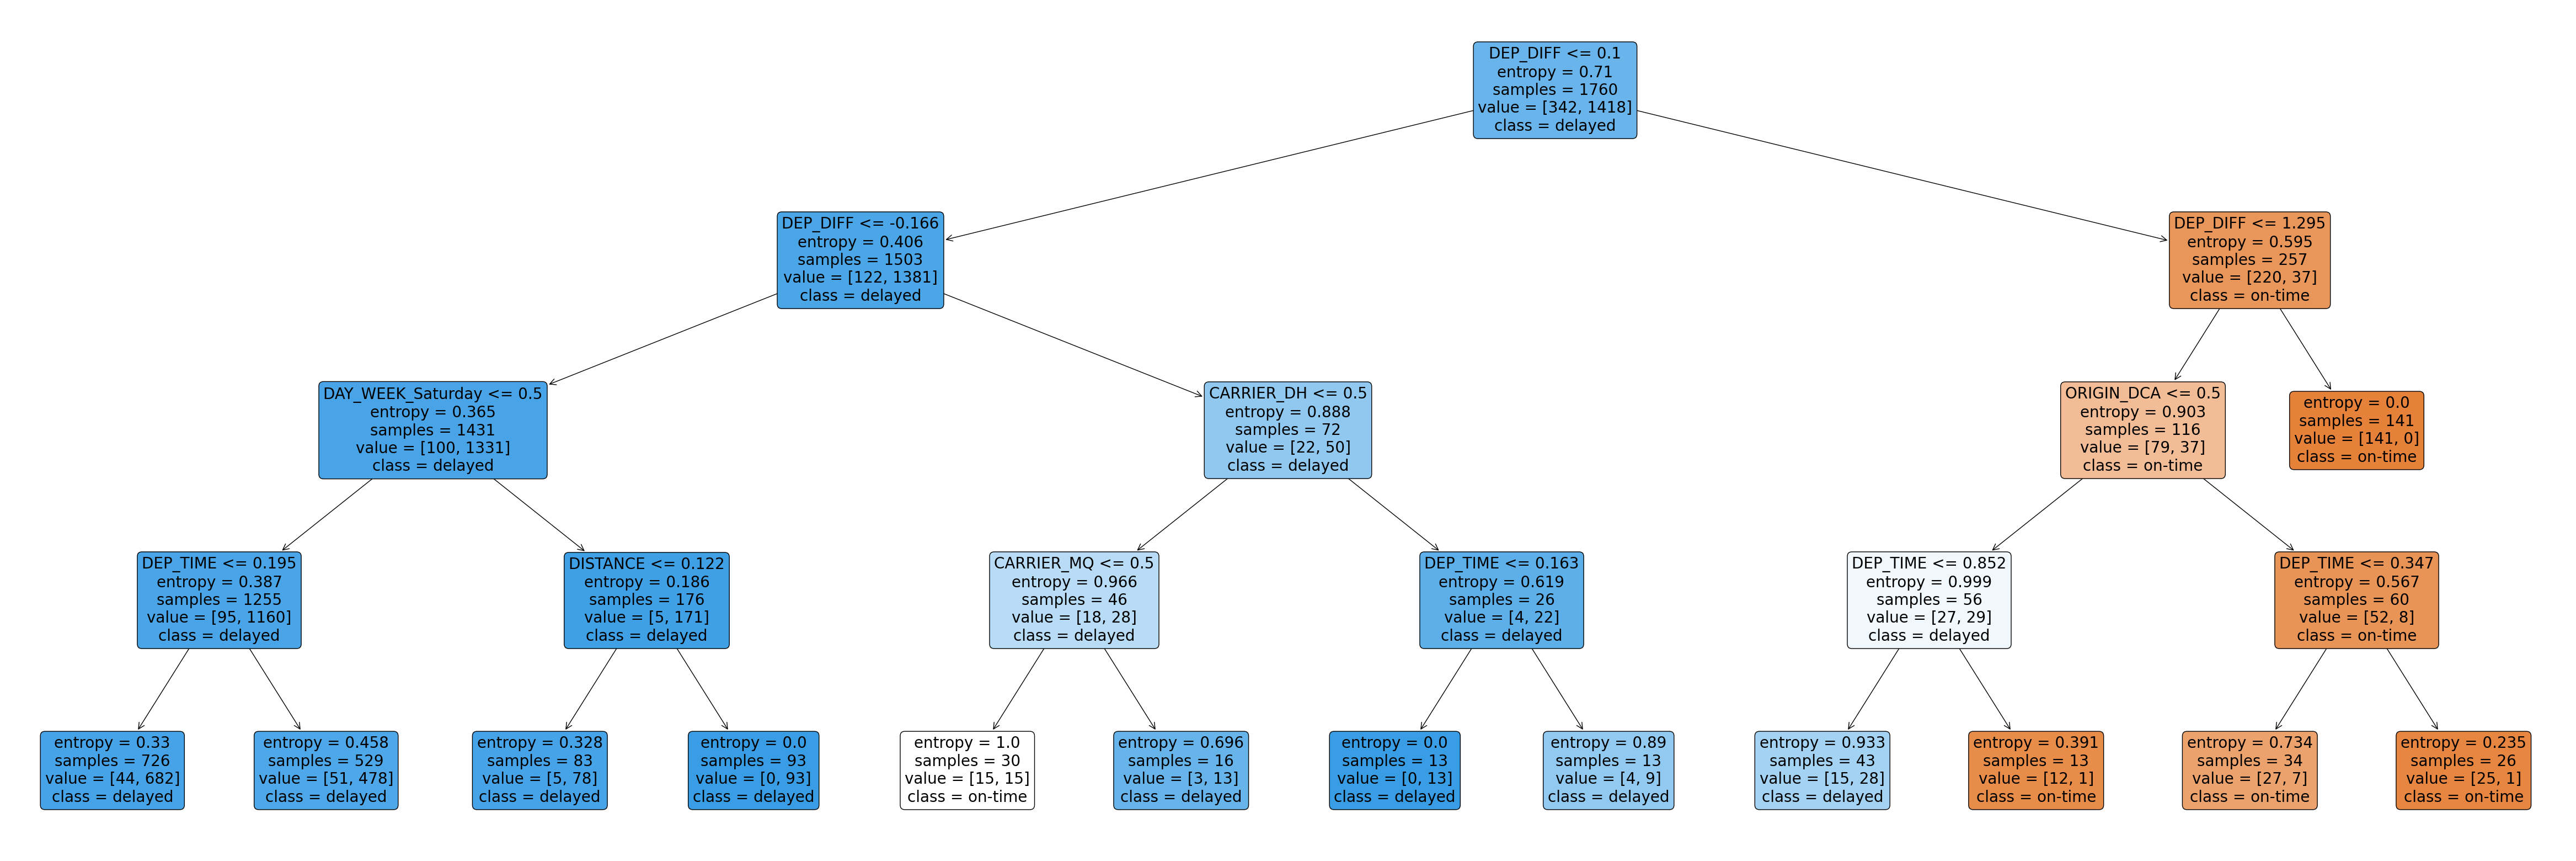

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(60,20))
display_tree = plot_tree(tree_pruned, feature_names=X_train.columns, class_names=["on-time", "delayed"], filled=True, rounded=True, fontsize=20)

In [ ]:
# variable importance in decision tree
importance = pd.DataFrame(tree_pruned.feature_importances_, index = X_train.columns, columns = ["Importance"])
importance.sort_values(by = "Importance", ascending = False)

,Importance
DEP_DIFF,0.911869
DEP_TIME,0.036226
ORIGIN_DCA,0.024221
DISTANCE,0.009044
DAY_WEEK_Saturday,0.007719
CARRIER_DH,0.005568
CARRIER_MQ,0.005354
DAY_WEEK_Sunday,0.000000
DAY_WEEK_Thursday,0.000000
DAY_WEEK_Tuesday,0.000000


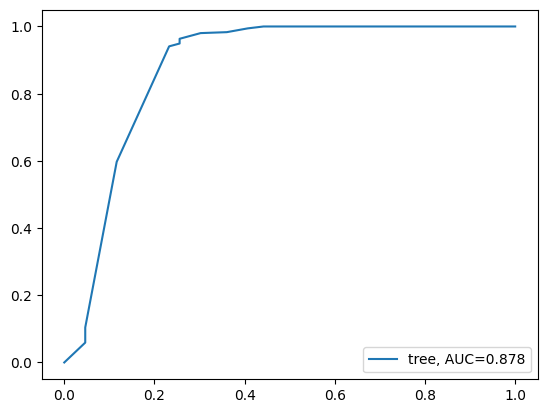

In [ ]:
from sklearn import metrics
from sklearn.metrics import roc_curve

y_pred_prob_tree = tree_pruned.predict_proba(X_test)[:,1]
fpr1 , tpr1, thresholds1 = roc_curve(y_test, y_pred_prob_tree)
auc_tree = round(metrics.roc_auc_score(y_test, y_pred_prob_tree), 3)
plt.plot(fpr1,tpr1,label="tree, AUC="+str(auc_tree))
plt.legend()

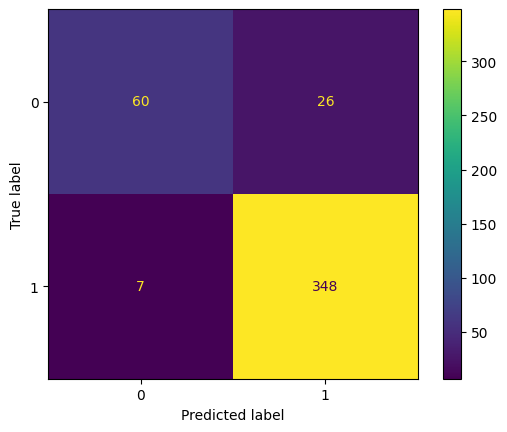

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

y_pred_tree = tree_pruned.predict(X_test)

# Plot confusion matrix for decision tree
cm_tree = confusion_matrix(y_test, y_pred_tree, labels=tree_pruned.classes_)
dsp = ConfusionMatrixDisplay(confusion_matrix=cm_tree, display_labels=tree_pruned.classes_)
dsp.plot()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_tree))

              precision    recall  f1-score   support

           0       0.90      0.70      0.78        86
           1       0.93      0.98      0.95       355

    accuracy                           0.93       441
   macro avg       0.91      0.84      0.87       441
weighted avg       0.92      0.93      0.92       441



**LOGISTIC REGRESSION**

In [ ]:
#2. Regression Model
      # Train logistic regression model & Accuracy Evaluation

from sklearn.linear_model import LogisticRegression

# Train logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Create DataFrame of coefficients
coef = pd.DataFrame(logreg.coef_[0], index=X_train.columns, columns=['Coefficients'])

# Sort coefficients
coef_sorted = coef.sort_values(by='Coefficients')
print(coef_sorted)

                    Coefficients
DEP_DIFF               -3.226079
Weather                -0.740748
CARRIER_MQ             -0.695153
ORIGIN_IAD             -0.346388
DAY_WEEK_Sunday        -0.248482
DAY_WEEK_Wednesday     -0.230113
DEP_TIME               -0.176048
ORIGIN_DCA             -0.129637
CARRIER_US             -0.121834
DAY_WEEK_Monday        -0.094218
CARRIER_DL              0.038055
DISTANCE                0.043760
DAY_WEEK_Tuesday        0.046422
CARRIER_RU              0.065874
DAY_WEEK_Thursday       0.132889
DEST_LGA                0.452618
CARRIER_UA              0.520500
DEST_JFK                0.623042
DAY_WEEK_Saturday       0.659871
CARRIER_DH              0.790042
CARRIER_OH              1.717045


In [ ]:
# Create DataFrame of exponentiated coefficients (odds)
df = pd.DataFrame(np.exp(logreg.coef_[0]), index=X_train.columns, columns=['Odds'])

# Sort by odds
df_sorted = df.sort_values(by='Odds')

df_sorted

,Odds
DEP_DIFF,0.039713
Weather,0.476757
CARRIER_MQ,0.498998
ORIGIN_IAD,0.707238
DAY_WEEK_Sunday,0.779984
DAY_WEEK_Wednesday,0.794444
DEP_TIME,0.838578
ORIGIN_DCA,0.878414
CARRIER_US,0.885296
DAY_WEEK_Monday,0.910084


In [ ]:
y_pred_reg = logreg.predict(X_test)

from sklearn import metrics
print("Accuracy on the training set::{:.3f}".format(logreg.score(X_train, y_train)))
print("Accuracy on the test set::{:.3f}".format(metrics.accuracy_score(y_test, y_pred_reg)))

Accuracy on the training set::0.909
Accuracy on the test set::0.918


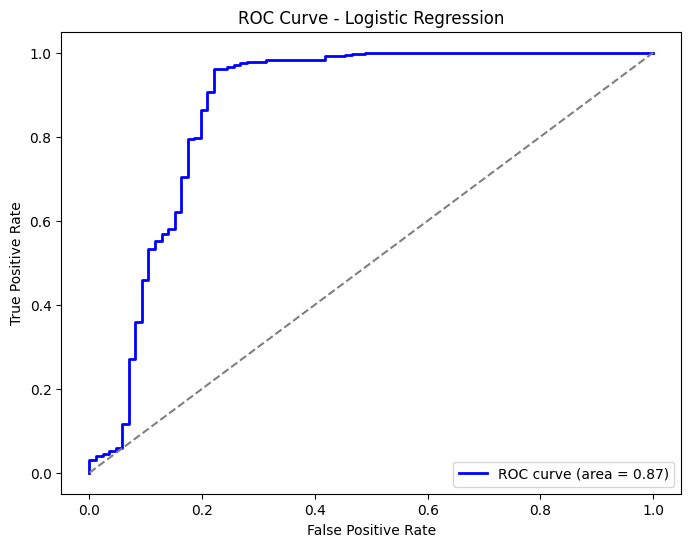

In [ ]:
from sklearn.metrics import roc_curve, auc

# Calculate the probabilities of the positive class from the logistic regression model
y_pred_prob_logreg = logreg.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC
fpr_logreg, tpr_logreg, thresholds_logreg = roc_curve(y_test, y_pred_prob_logreg)
roc_auc_logreg = auc(fpr_logreg, tpr_logreg)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_logreg, tpr_logreg, color='blue', lw=2, label=f'ROC curve (area = {roc_auc_logreg:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random guess line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc='lower right')
plt.show()

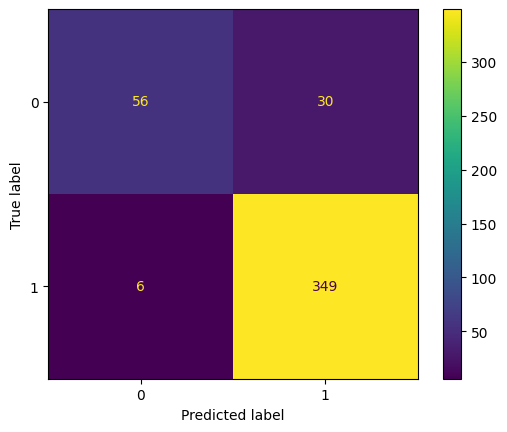

In [ ]:
# Confusion Matrix
cm_reg = confusion_matrix(y_test, y_pred_reg, labels=logreg.classes_)
dsp = ConfusionMatrixDisplay(confusion_matrix=cm_reg, display_labels=logreg.classes_)
dsp.plot()

In [ ]:
print(classification_report(y_test, y_pred_reg))

              precision    recall  f1-score   support

           0       0.90      0.65      0.76        86
           1       0.92      0.98      0.95       355

    accuracy                           0.92       441
   macro avg       0.91      0.82      0.85       441
weighted avg       0.92      0.92      0.91       441



**RANDOM FOREST**

In [ ]:
# 3. Random Forest

from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=10, random_state=0)
forest.fit(X_train, y_train)

y_rf_pred = forest.predict(X_test)

print("Random Forest Accuracy on the training set::{:.3f}".format(logreg.score(X_train, y_train)))
print("Random Forest Accuracy on test set: {:.3f}".format(accuracy_score(y_test, y_rf_pred)))

Random Forest Accuracy on the training set::0.909
Random Forest Accuracy on test set: 0.893


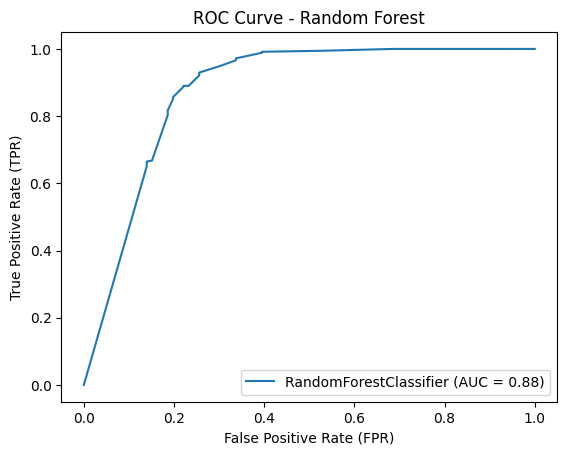

In [ ]:
from sklearn.metrics import RocCurveDisplay
roc_display = RocCurveDisplay.from_estimator(forest, X_test, y_test)

# Customize axis labels
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve - Random Forest')

# Show plot
plt.show()